In [326]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [327]:
cd /content/drive/MyDrive/AIStudy/Task/titanic

/content/drive/MyDrive/AIStudy/Task/titanic


In [328]:
ls

gender_submission.csv  my_tree12.csv     my_tree_one6.csv  taitanic.ipynb
my_gsGBC2.csv          my_tree_one2.csv  my_tree_one7.csv  test.csv
my_gsGBC.csv           my_tree_one3.csv  my_tree_one8.csv  train.csv
my_tree10.csv          my_tree_one4.csv  my_tree_one9.csv
my_tree11.csv          my_tree_one5.csv  my_tree_one.csv


In [329]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [330]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [331]:
df_test["Fare"]  = df_test["Fare"].fillna(df_train["Fare"].median())

In [332]:
print(df_test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [333]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [334]:
df_train['title'] = df_train['Name'].apply(lambda x:x.split(', ')[1].split('. ')[0])
df_test['title'] = df_test['Name'].apply(lambda x:x.split(', ')[1].split('. ')[0])

In [335]:
df_train.loc[df_train['title'] == 'Mlle', 'title'] = 'Miss'
df_train.loc[df_train['title'] == 'Ms', 'title'] = 'Miss'
# ↓は項目が多いやつを効率的にやる方法です
col1 = ['Lady', 'Mme', 'Dona', 'the Countess']
col2 = ['Jonkheer', 'Don', 'Sir']
col3 = ['Dr', 'Rev', 'Major', 'Col', 'Capt']
idx1 = df_train['title'].isin(col1)
df_train['title'][idx1] = 'Mrs'
idx2 = df_train['title'].isin(col2)
df_train['title'][idx2] = 'Mr'
idx3 = df_train['title'].isin(col3)
df_train['title'][idx3] = 'Rare'
df_train['title'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Mr        520
Miss      185
Mrs       128
Master     40
Rare       18
Name: title, dtype: int64

In [336]:
df_test.loc[df_test['title'] == 'Mlle', 'title'] = 'Miss'
df_test.loc[df_test['title'] == 'Ms', 'title'] = 'Miss'
# ↓は項目が多いやつを効率的にやる方法です
col1 = ['Lady', 'Mme', 'Dona', 'the Countess']
col2 = ['Jonkheer', 'Don', 'Sir']
col3 = ['Dr', 'Rev', 'Major', 'Col', 'Capt']
idx1 = df_test['title'].isin(col1)
df_test['title'][idx1] = 'Mrs'
idx2 = df_test['title'].isin(col2)
df_test['title'][idx2] = 'Mr'
idx3 = df_test['title'].isin(col3)
df_test['title'][idx3] = 'Rare'
df_test['title'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Mr        240
Miss       79
Mrs        73
Master     21
Rare        5
Name: title, dtype: int64

In [337]:
df_train['title'] = df_train['title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2,'Master': 3, 'Rare': 4})
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_train['Embarked'] = df_train['Embarked'].fillna('S')
df_train['Embarked'] = df_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [338]:
df_test['title'] = df_test['title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2,'Master': 3, 'Rare': 4})
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})
df_test['Embarked'] = df_test['Embarked'].fillna('S')
df_test['Embarked'] = df_test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

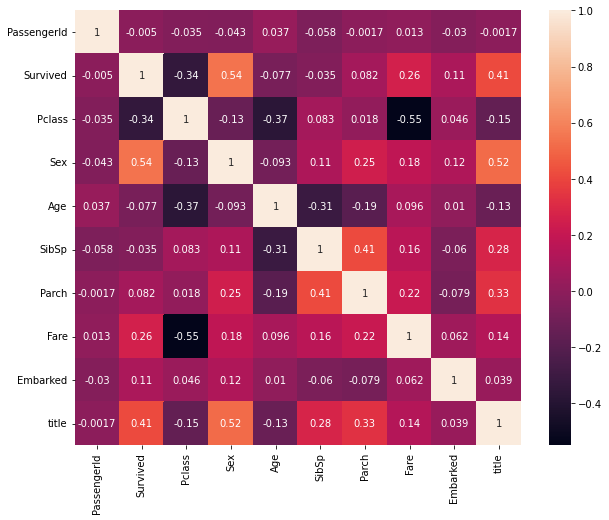

In [339]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(),annot=True)

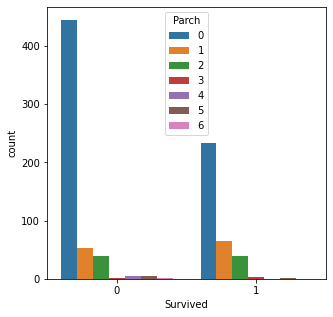

In [340]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Survived', hue='Parch', data=df_train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


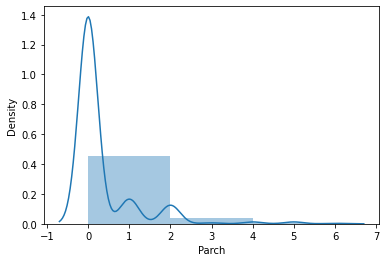

In [341]:
sns.distplot(df_train[df_train['Survived'] == 0 ]['Parch'], norm_hist=True, bins=3)

In [342]:
df_train["family_size"] = (df_train["SibSp"] + df_train["Parch"])
df_train["alone"]=df_train["family_size"].apply(lambda x : 1 if x == 0 else 0)

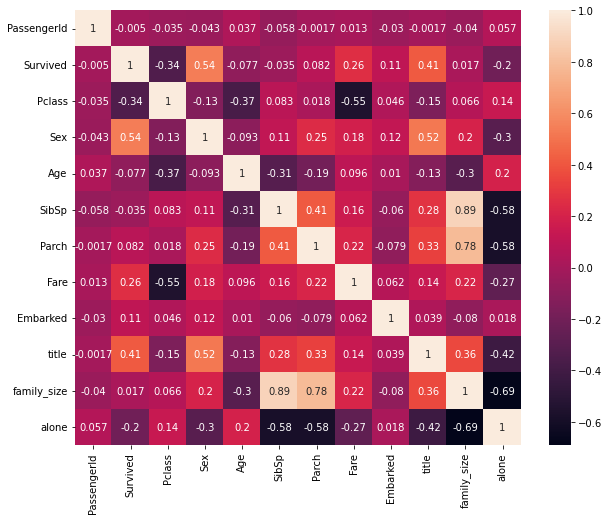

In [343]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(),annot=True)

In [344]:
df_test["family_size"] = (df_test["SibSp"] + df_test["Parch"])
df_test["alone"]=df_test["family_size"].apply(lambda x : 1 if x == 0 else 0)

In [345]:
df_train.groupby('Pclass').mean()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,title,family_size,alone
Pclass,,,,,,,,,,,
1,461.597222,0.629630,0.435185,38.233441,0.416667,0.356481,84.154687,0.412037,0.865741,0.773148,0.504630
2,445.956522,0.472826,0.413043,29.877630,0.402174,0.380435,20.662183,0.125000,0.956522,0.782609,0.565217
3,439.154786,0.242363,0.293279,25.140620,0.615071,0.393075,13.675550,0.427699,0.549898,1.008147,0.659878


In [346]:
df_train["Age"]= df_train.groupby('Pclass').transform(lambda x: x.fillna(x.mean()))['Age']
df_test["Age"]= df_train.groupby('Pclass').transform(lambda x: x.fillna(x.mean()))['Age']
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


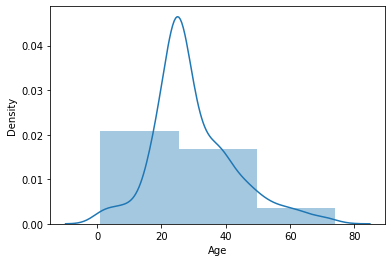

In [347]:
sns.distplot(df_train[df_train['Survived'] == 0 ]['Age'], norm_hist=True, bins=3)

In [348]:
df_train['AgeBand'] = pd.cut(df_train['Age'], 5)
df_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [349]:
df_train.loc[ df_train['Age'] <= 16, 'Age'] = 0
df_train.loc[(df_train['Age'] > 16) & (df_train['Age'] <= 32), 'Age'] = 1
df_train.loc[(df_train['Age'] > 32) & (df_train['Age'] <= 48), 'Age'] = 2
df_train.loc[(df_train['Age'] > 48) & (df_train['Age'] <= 64), 'Age'] = 3
df_train.loc[ df_train['Age'] > 64, 'Age'] = 4
df_train['Age'] = df_train['Age'].astype('int')

In [350]:
df_test.loc[ df_test['Age'] <= 16, 'Age'] = 0
df_test.loc[(df_test['Age'] > 16) & (df_test['Age'] <= 32), 'Age'] = 1
df_test.loc[(df_test['Age'] > 32) & (df_test['Age'] <= 48), 'Age'] = 2
df_test.loc[(df_test['Age'] > 48) & (df_test['Age'] <= 64), 'Age'] = 3
df_test.loc[ df_test['Age'] > 64, 'Age'] = 4
df_test['Age'] = df_test['Age'].astype('int')

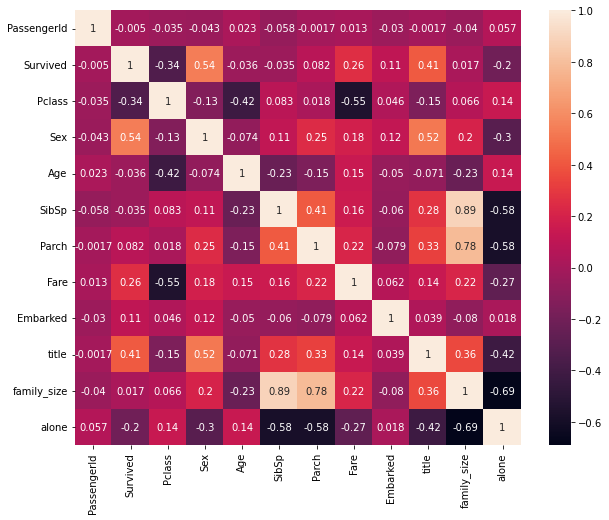

In [351]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(),annot=True)

In [352]:
combine = [df_train , df_test]

for dataset in combine:
    dataset['Single'] = dataset['family_size'].map(lambda s: 1 if s == 1 else 0)
    dataset['SmallF'] = dataset['family_size'].map(lambda s: 1 if  s == 2  else 0)
    dataset['MedF'] = dataset['family_size'].map(lambda s: 1 if 3 <= s <= 4 else 0)
    dataset['LargeF'] = dataset['family_size'].map(lambda s: 1 if s >= 5 else 0)

In [353]:
for dataset in combine:
    dataset['YoungAge'] = dataset['Age'].map(lambda s: 1 if s == 0 else 0)
    dataset['OldAge'] = dataset['Age'].map(lambda s: 1 if  s == 4  else 0)


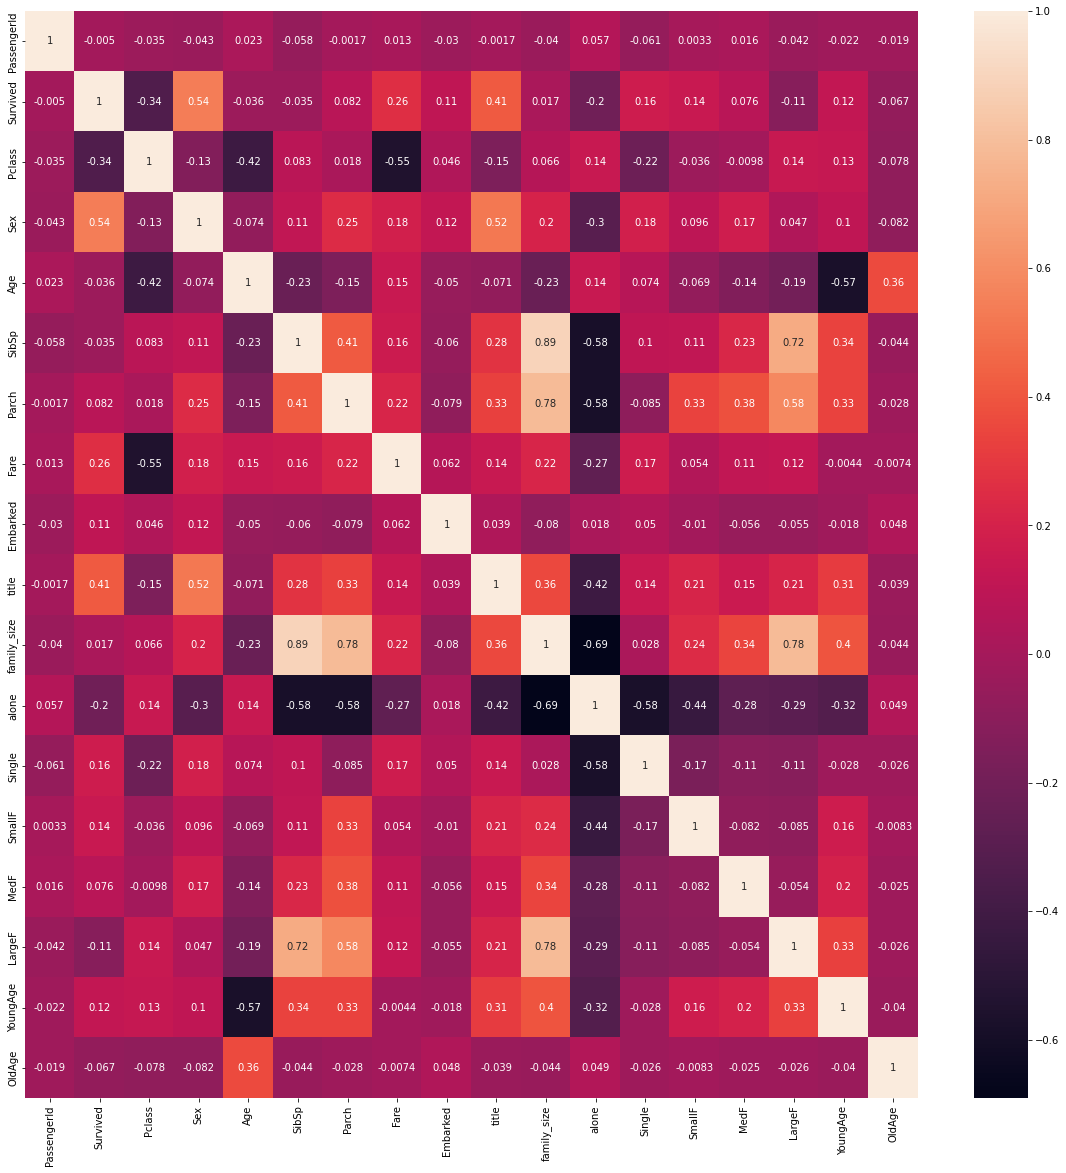

In [354]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(),annot=True)

In [355]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [356]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,title,family_size,alone,AgeBand,Single,SmallF,MedF,LargeF,YoungAge,OldAge
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,...,0,1,0,"(16.336, 32.252]",1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,...,2,1,0,"(32.252, 48.168]",1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,...,1,0,1,"(16.336, 32.252]",0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,...,2,1,0,"(32.252, 48.168]",1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,...,0,0,1,"(32.252, 48.168]",0,0,0,0,0,0


In [357]:
df_train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex               int64
Age               int64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked          int64
title             int64
family_size       int64
alone             int64
AgeBand        category
Single            int64
SmallF            int64
MedF              int64
LargeF            int64
YoungAge          int64
OldAge            int64
dtype: object

In [358]:
x = df_train.drop(['PassengerId', 'Survived','SibSp' ,'Name','Parch','Ticket', 'Cabin','family_size','MedF','LargeF','AgeBand','Age','OldAge'], axis=1)
X_train = df_train.drop(['PassengerId', 'Survived','SibSp' ,'Name','Parch','Ticket', 'Cabin','family_size','MedF','LargeF','AgeBand','Age','OldAge'], axis=1)

x.head()

,Pclass,Sex,Fare,Embarked,title,alone,Single,SmallF,YoungAge
0,3,0,7.2500,0,0,0,1,0,0
1,1,1,71.2833,1,2,0,1,0,0
2,3,1,7.9250,0,1,1,0,0,0
3,1,1,53.1000,0,2,0,1,0,0
4,3,0,8.0500,0,0,1,0,0,0


In [359]:
x_test = df_test.drop(['PassengerId','SibSp' , 'Name','Parch','Ticket', 'Cabin','family_size','MedF','LargeF','Age','OldAge'], axis=1)
Test = df_test.drop(['PassengerId','SibSp' , 'Name','Parch','Ticket', 'Cabin','family_size','MedF','LargeF','Age','OldAge'], axis=1)

x_test.head()

,Pclass,Sex,Fare,Embarked,title,alone,Single,SmallF,YoungAge
0,3,0,7.8292,2,0,1,0,0,0
1,3,1,7.0000,0,2,0,1,0,0
2,2,0,9.6875,2,0,1,0,0,0
3,3,0,8.6625,0,0,1,0,0,0
4,3,1,12.2875,0,2,0,0,1,0


In [360]:
Test.head()

,Pclass,Sex,Fare,Embarked,title,alone,Single,SmallF,YoungAge
0,3,0,7.8292,2,0,1,0,0,0
1,3,1,7.0000,0,2,0,1,0,0
2,2,0,9.6875,2,0,1,0,0,0
3,3,0,8.6625,0,0,1,0,0,0
4,3,1,12.2875,0,2,0,0,1,0


In [361]:
x_test.isnull().sum()

Pclass      0
Sex         0
Fare        0
Embarked    0
title       0
alone       0
Single      0
SmallF      0
YoungAge    0
dtype: int64

In [362]:
y = df_train['Survived']
Y_train = df_train['Survived']

rf = RandomForestClassifier()
rf.fit(x, y)


pred = rf.predict(x_test)

print(pred)

[0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 1]


In [363]:
import numpy as np

PassengerId = np.array(df_test["PassengerId"]).astype(int)
 
# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(pred, PassengerId, columns = ["Survived"])
 
# my_tree_one.csvとして書き出し
my_solution.to_csv("my_tree12.csv", index_label = ["PassengerId"])

In [364]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [365]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


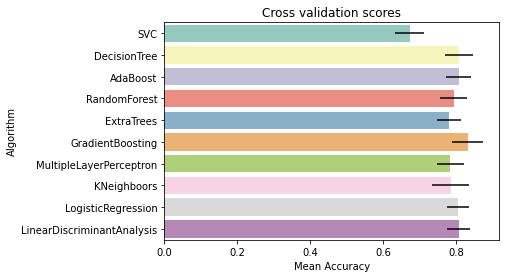

In [366]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [367]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


0.8159675405742821

In [368]:
pred = gsGBC.predict(Test)

print(pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 0 0 1]


In [369]:
import numpy as np

PassengerId = np.array(df_test["PassengerId"]).astype(int)
 
# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(pred, PassengerId, columns = ["Survived"])
 
my_solution.to_csv("my_gsGBC2.csv", index_label = ["PassengerId"])